### 데이터 전처리(결측치 처리, 클래스 불균형 확인 및 처리)  
### 특성공학 - 피처선정 또는 피처생성  
### 베이스 모델 선정  
  - 분류모델 : LogisticRegression  
  - 클래스 리포트, 과적합여부  
### 베이스 모델의 성능을 상회하는 모델과 하이퍼 파라메터 조합을 찾아서 성능을 출력  

In [12]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python/refs/heads/main/data/tellecom.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_18100\4268978056.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].replace(' ',np.nan, inplace=True)


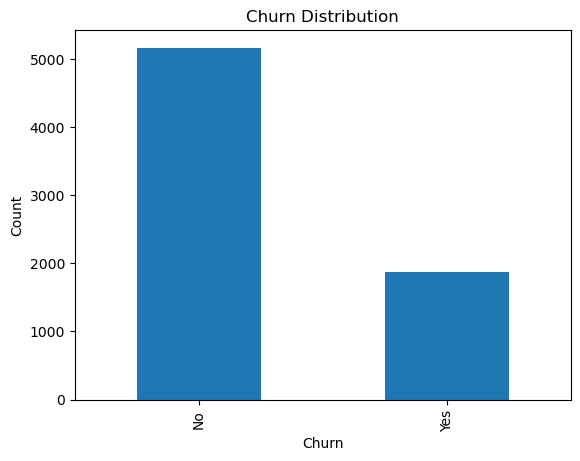

In [13]:
### 데이터 전처리(결측치 처리, 클래스 불균형 확인 및 처리)  
df.isna().sum()
df[df['TotalCharges']==' ']

# TotalCharges의 공백 결측치를 변경
import numpy as np
df['TotalCharges'].replace(' ',np.nan, inplace=True)
df.dropna(subset=['TotalCharges'],inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

### 타겟 변수 Churn 클래스 불균형 확인
print(df['Churn'].value_counts())

# 시각화
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [14]:
### 클래스 불균형 및 처리
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Churn 컬럼을 0과 1로 변환
df['Churn'].replace({'No': 0, 'Yes':1}, inplace=True)

# 나머지 문자열 컬럼 원 핫 인코딩
df_dummies = pd.get_dummies(df.drop('customerID', axis =1))

X = df_dummies.drop('Churn', axis = 1)
y = df_dummies['Churn']

# 학습, 테스트 분리
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 42, stratify=y)

# SMOTE 적용
smote = SMOTE(random_state=42)
x_train_over, y_train_over = smote.fit_resample(x_train,y_train)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_18100\2917509580.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace({'No': 0, 'Yes':1}, inplace=True)
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_18100\2917509580.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].repl

In [15]:
### 특성공학 - 피처선정 또는 피처생성
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

base_model = LogisticRegression(max_iter=1000, random_state=42)
base_model.fit(x_train_over,y_train_over)

train_pred = base_model.predict(x_train_over)
test_pred = base_model.predict(x_test)

train_acc = accuracy_score(y_train_over,train_pred)
test_acc = accuracy_score(y_test,test_pred)

print(f'학습 데이터 정확도 : {train_acc: .4f}')
print(f'테스트 데이터 정확도 : {train_acc: .4f}')
print('<테스트 데이터 클래스 리포트>')
print(classification_report(y_test, test_pred, target_names=['Churn: No', 'Churn: Yes']))
    


학습 데이터 정확도 :  0.8597
테스트 데이터 정확도 :  0.8597
<테스트 데이터 클래스 리포트>
              precision    recall  f1-score   support

   Churn: No       0.85      0.86      0.86      1549
  Churn: Yes       0.60      0.58      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.78      0.79      0.79      2110



c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_over, y_train_over)

rf_pred = rf_model.predict(x_test)

test_acc_rf = accuracy_score(y_test, rf_pred)

print(f' RandomForst 테스트 데이터 정확도 : {test_acc_rf:.4f}')
print(classification_report(y_test, rf_pred, target_names=['Churn:No','Churn:Yes']))

 RandomForst 테스트 데이터 정확도 : 0.7749
              precision    recall  f1-score   support

    Churn:No       0.83      0.87      0.85      1549
   Churn:Yes       0.59      0.50      0.54       561

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.77      0.77      2110



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

models = {
    'LogisticRegression' : LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree' : DecisionTreeClassifier(random_state=42),
    'RandomForest' : RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(x_train_over,y_train_over)
    pred = model.predict(x_test)

    print(f' {name} 성능 리포트')
    print(classification_report(y_test,pred,target_names=['Churn:No','Churn:Yes']))
    #print('\\n'+ '='*50 +'\\n')

c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 LogisticRegression 성능 리포트
              precision    recall  f1-score   support

    Churn:No       0.85      0.86      0.86      1549
   Churn:Yes       0.60      0.58      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.78      0.79      0.79      2110

 Decision Tree 성능 리포트
              precision    recall  f1-score   support

    Churn:No       0.82      0.80      0.81      1549
   Churn:Yes       0.48      0.52      0.50       561

    accuracy                           0.73      2110
   macro avg       0.65      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110

 RandomForest 성능 리포트
              precision    recall  f1-score   support

    Churn:No       0.83      0.87      0.85      1549
   Churn:Yes       0.59      0.50      0.54       561

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.70      2110
weig

In [26]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100,200],
    'max_depth' : [6,8,10],
    'min_samples_leaf' : [8,12]
}

grid_cv = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

grid_cv.fit(x_train_over, y_train_over)

print('최적 하이퍼파라미터', grid_cv.best_params_)

best_rf_model = grid_cv.best_estimator_
best_rf_pred = best_rf_model.predict(x_test)
print('최적화된 randomforst 테스트 데이터 클래스 리포트')
print(classification_report(y_test, best_rf_pred, target_names=['Churn:No','Churn:Yes']))


최적 하이퍼파라미터 {'max_depth': 10, 'min_samples_leaf': 8, 'n_estimators': 200}
최적화된 randomforst 테스트 데이터 클래스 리포트
              precision    recall  f1-score   support

    Churn:No       0.87      0.84      0.85      1549
   Churn:Yes       0.59      0.65      0.62       561

    accuracy                           0.79      2110
   macro avg       0.73      0.75      0.74      2110
weighted avg       0.80      0.79      0.79      2110



In [45]:
%pip install xgboost lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ------ --------------------------------- 11.8/72.0 MB 61.4 MB/s eta 0:00:01
   -------- ------------------------------- 16.0/72.0 MB 38.6 MB/s eta 0:00:02
   -------------- ------------------------- 26.2/72.0 MB 41.5 MB/s eta 0:00:02
   ------------------ --------------------- 33.8/72.0 MB 42.1 MB/s eta 0:00:01
   --------------------- ------------------ 38.8/72.0 MB 37.9 MB/s eta 0:00:01
   --------------------- ------------------ 39.6/72.0 MB 31.5 MB/s eta 0:00:02
   ------------------------------ --------- 54.3/72.0 MB 37.2 MB/s eta 0:00:01
   ---------------------------------------  70.3/72.0 MB 41.9 MB/s eta 0:00:01
   ---------------------------------------  70.8/72.0 MB 37.9 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 36.9 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 36.9 MB/s eta

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {'LogisticRegression' : LogisticRegression(max_iter=1000, random_state=42),
'Decision Tree' : DecisionTreeClassifier(random_state=42),
'RandomForest' : RandomForestClassifier(random_state=42),
'xGBoost' : XGBClassifier(random_state=42, use_lable_encoder =False, eval_metric = 'logloss'),
'LightGBM' : LGBMClassifier(random_state=42,verbosity=-1)
}


for name, model in models.items():
    pipeline = make_pipeline(SMOTE(random_state=42),model)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline,X,y,cv = skf, scoring='recall_macro')
    print(f'{name} 교차 검증 결과')
    print(f'평균 reall : {np.mean(scores):.4f}(+/-{np.std(scores):.4f})')
    print("-"*(len(name)+24)+'\\n')


c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

LogisticRegression 교차 검증 결과
평균 reall : 0.7323(+/-0.0108)
------------------------------------------\n
Decision Tree 교차 검증 결과
평균 reall : 0.6639(+/-0.0152)
-------------------------------------\n
RandomForest 교차 검증 결과
평균 reall : 0.6991(+/-0.0084)
------------------------------------\n


c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_lable_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_lable_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_lable_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_

xGBoost 교차 검증 결과
평균 reall : 0.7100(+/-0.0100)
-------------------------------\n
LightGBM 교차 검증 결과
평균 reall : 0.7180(+/-0.0048)
--------------------------------\n
